In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [62]:
pts = 23
n = 0
matriz_vazia = np.zeros((pts,2), dtype=float)
matriz_vazia_circular = np.zeros((pts,2), dtype=float)
registroDistPop = []
geracoes = []

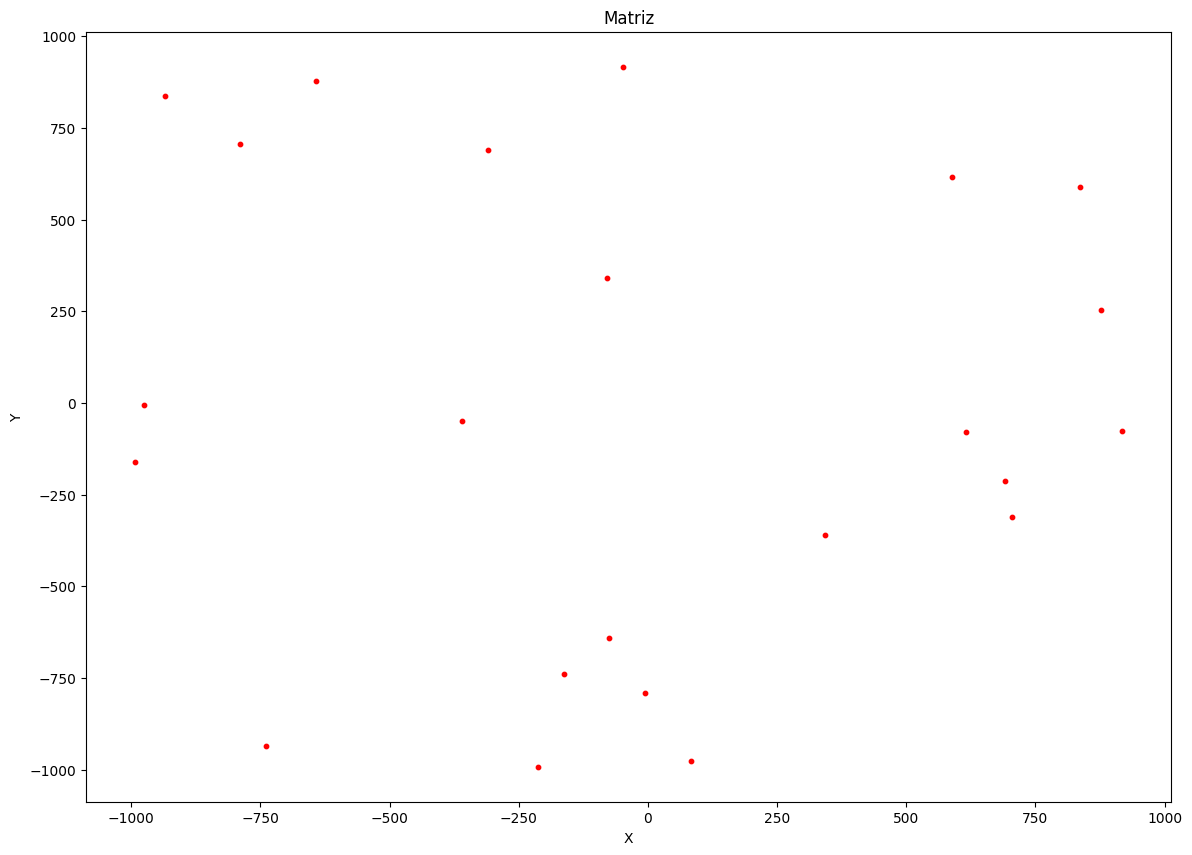

In [68]:
def CriaPts():
  n = 0
  lista = []
  while n < pts*2:
    x = random.randrange(-1000,1000)
    lista.append(x)
    n += 1

  for i in range(pts):
    X = lista[i]
    Y = lista[i+1]
    matriz_vazia[i] = [X, Y]
    i+=2

  #print(matriz_vazia)

  x = matriz_vazia[:, 0]
  y = matriz_vazia[:, 1]

  plt.figure(figsize=(14, 10))
  plt.scatter(x,y,s=10,c='Red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Matriz')
  plt.show()

CriaPts()

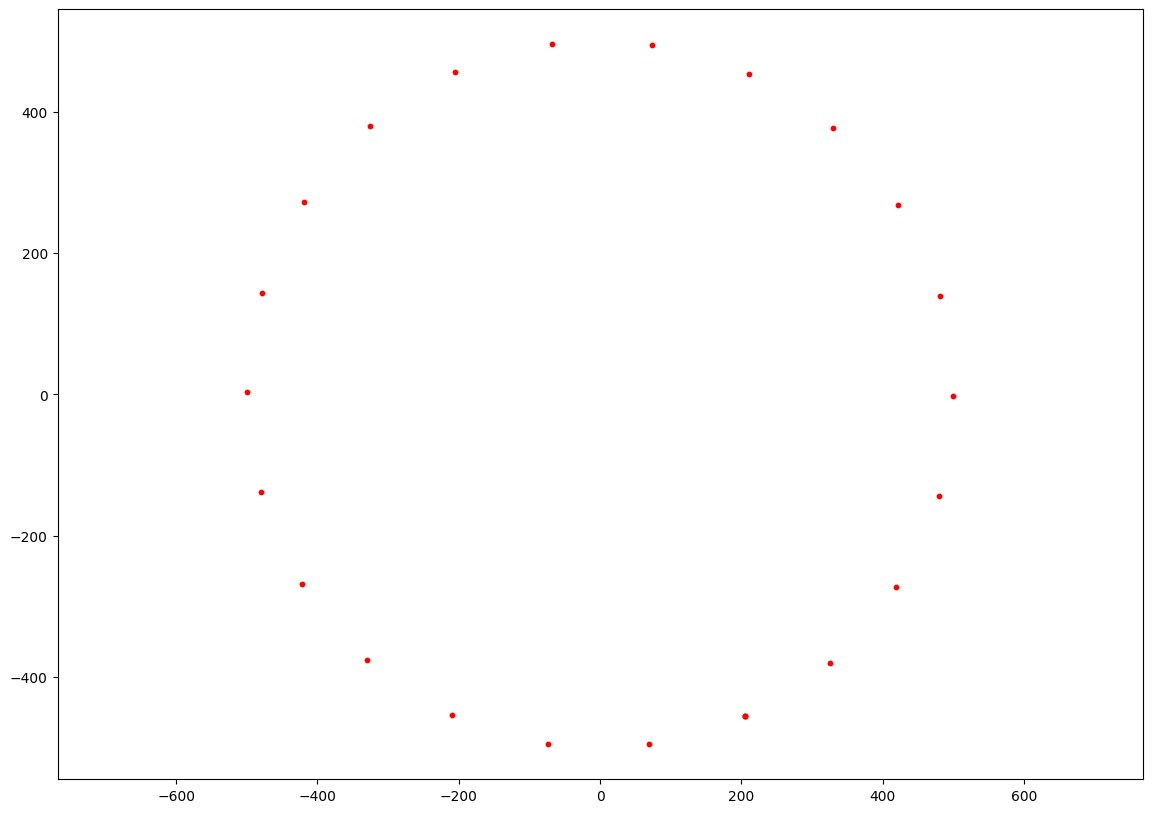

In [69]:
#num_pontos = 0
def CriaPtsCircular():
  # Definir o número de pontos desejados
  #pts = 10

  # Definir o raio do círculo
  raio = 500

  # Gerar a orientação aleatória do primeiro ponto
  orientacao = random.uniform(0, 2*math.pi)

  # Criar uma lista para armazenar as coordenadas x e y dos pontos
  coordenadas_x = []
  coordenadas_y = []

  # Adicionar as coordenadas do primeiro ponto
  coordenadas_x.append(raio * math.cos(orientacao))
  coordenadas_y.append(raio * math.sin(orientacao))

  # Calcular o espaçamento angular entre os pontos restantes
  espacamento_angular = 2*math.pi / (pts - 1)

  # Gerar as coordenadas dos pontos restantes em torno do círculo
  for i in range(pts):
      # Calcular o ângulo do ponto atual
      angulo = orientacao + i * espacamento_angular

      # Calcular as coordenadas x e y do ponto usando trigonometria
      x = raio * math.cos(angulo)
      y = raio * math.sin(angulo)

      # Adicionar as coordenadas na lista correspondente
      coordenadas_x.append(x)
      matriz_vazia_circular[i][0] = x
      coordenadas_y.append(y)
      matriz_vazia_circular[i][1] = y
      #print(i)

  #print(matriz_vazia_circular)
  # Plotar os pontos
  plt.figure(figsize=(14, 10))
  plt.scatter(coordenadas_x, coordenadas_y,s=10,c='Red')
  plt.axis('equal')
  plt.show()

CriaPtsCircular()

In [34]:
def CalcDist(x1, y1, x2, y2):
  distancia = math.sqrt((x2-x1)**2 + (y2-y1)**2) #pesquisar sobre pdist
  return distancia

In [35]:
def CalculaDistanciaList(exemplo,pts):
  lista = []
  soma = 0

  #print("exemplo : ", exemplo)
  for F in range(len(exemplo)-1):
    #print(CalcDist(matriz_vazia[exemplo[F]][0], matriz_vazia[exemplo[F]][1], matriz_vazia[exemplo[F+1]][0], matriz_vazia[exemplo[F+1]][1]))
    lista.append(CalcDist(pts[exemplo[F]][0], pts[exemplo[F]][1], pts[exemplo[F+1]][0], pts[exemplo[F+1]][1]))
    #colocar o valor do -1 com o 0 fora do for

  lista.append(CalcDist(pts[exemplo[0]][0],pts[exemplo[0]][1],pts[exemplo[len(exemplo)-1]][0],pts[exemplo[len(exemplo)-1]][1]))

  soma = sum(lista)
  return soma

In [36]:
def OrdenaIndice(DistTotalPop):
  indices = list(range(len(DistTotalPop)))
  indices_ordenados = sorted(indices, key=lambda i: DistTotalPop[i])
  return indices_ordenados

In [37]:
def Mutation(Filho):
  IndMut = random.randrange(0,1000)
  #print(IndMut)
  if IndMut < 800:
    Filho = Filho
    return Filho
  elif IndMut > 800 and IndMut < 970:
    #print("mutou")
    for n in range(int(pts/8)):
      n1 = random.randrange(0,pts)
      n2 = random.randrange(0,pts)
      x = Filho[n2]
      Filho[n2] = Filho[n1]
      Filho[n1] = x
    return Filho
  else:
    #print("mutou")
    for n in range(int(pts/4)):
      n1 = random.randrange(0,pts)
      n2 = random.randrange(0,pts)
      x = Filho[n2]
      Filho[n2] = Filho[n1]
      Filho[n1] = x
    return Filho

In [38]:
def ResultGraph(matriz):

  coordenadas_x = []
  coordenadas_y = []

  for n in range(len(matriz)):
    coordenadas_x.append(matriz[n][0])
    coordenadas_y.append(matriz[n][1])

  # Lista de caminho
  caminho = list(Caminhos[IndMin])
  caminho.append(Caminhos[IndMin][0])  # Índices das coordenadas para traçar o caminho

  plt.figure(figsize=(14, 10))

  # Plotar os pontos
  plt.scatter(coordenadas_x, coordenadas_y, s=10,color='black')

  # Plotar o caminho
  x_caminho = [coordenadas_x[i] for i in caminho]
  y_caminho = [coordenadas_y[i] for i in caminho]
  plt.plot(x_caminho, y_caminho, color='red')

  # Adicionar as legendas dos pontos
  for i, (x, y) in enumerate(zip(coordenadas_x, coordenadas_y)):
      plt.annotate(f'P{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

  # Configurar o tamanho da figura
  #plt.figure(figsize=(14, 10))

  # Exibir o gráfico
  plt.show()


gen :  0


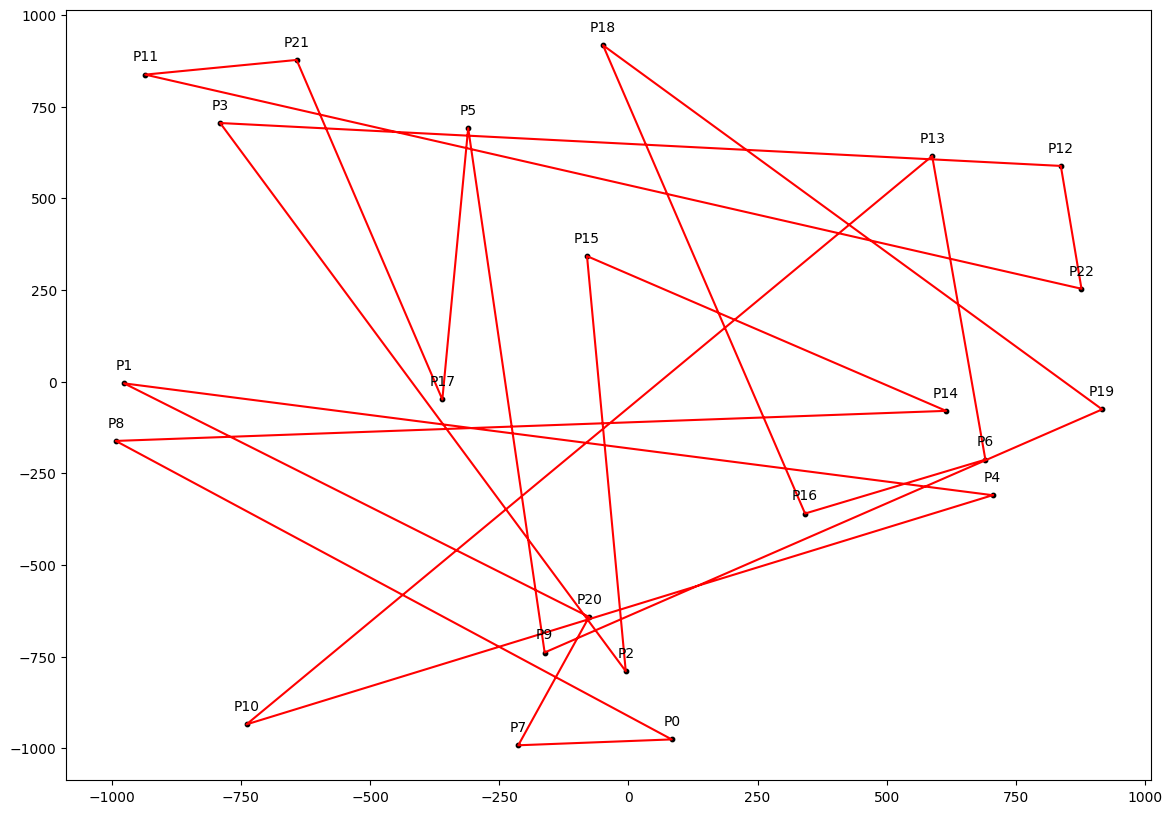

gen :  100


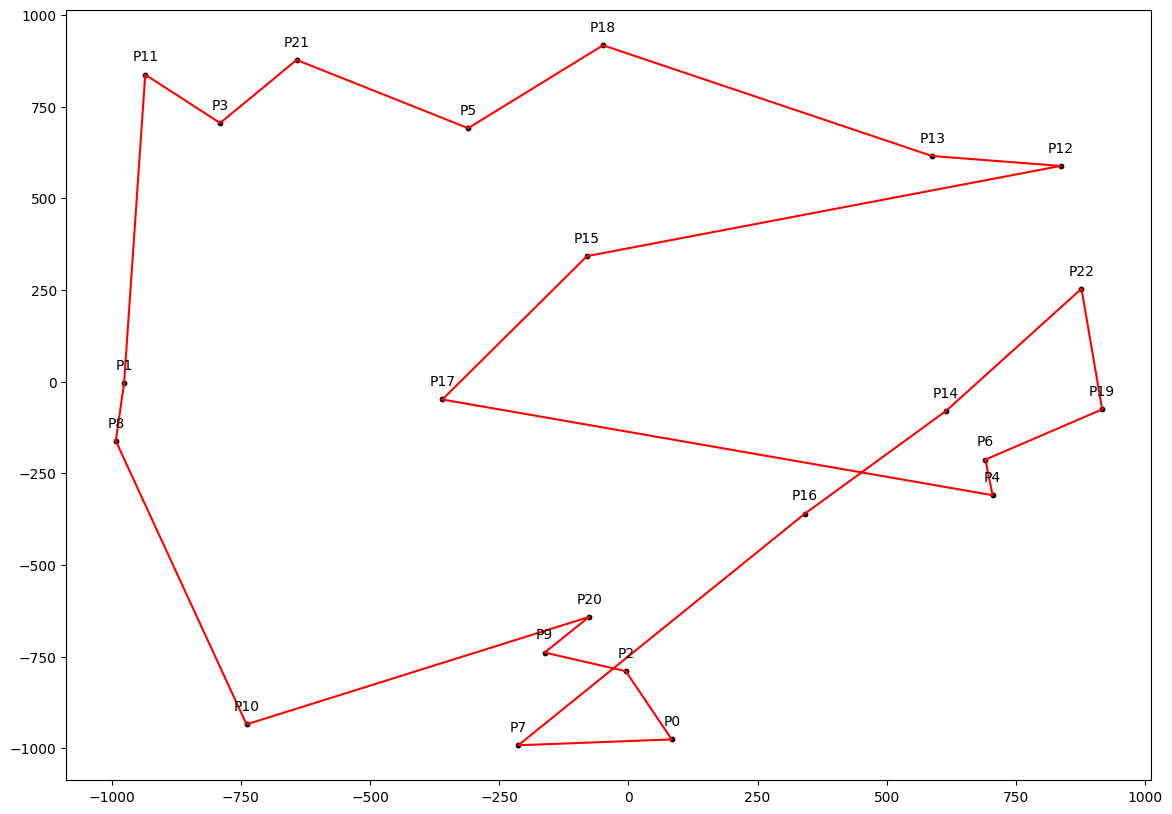

gen :  200


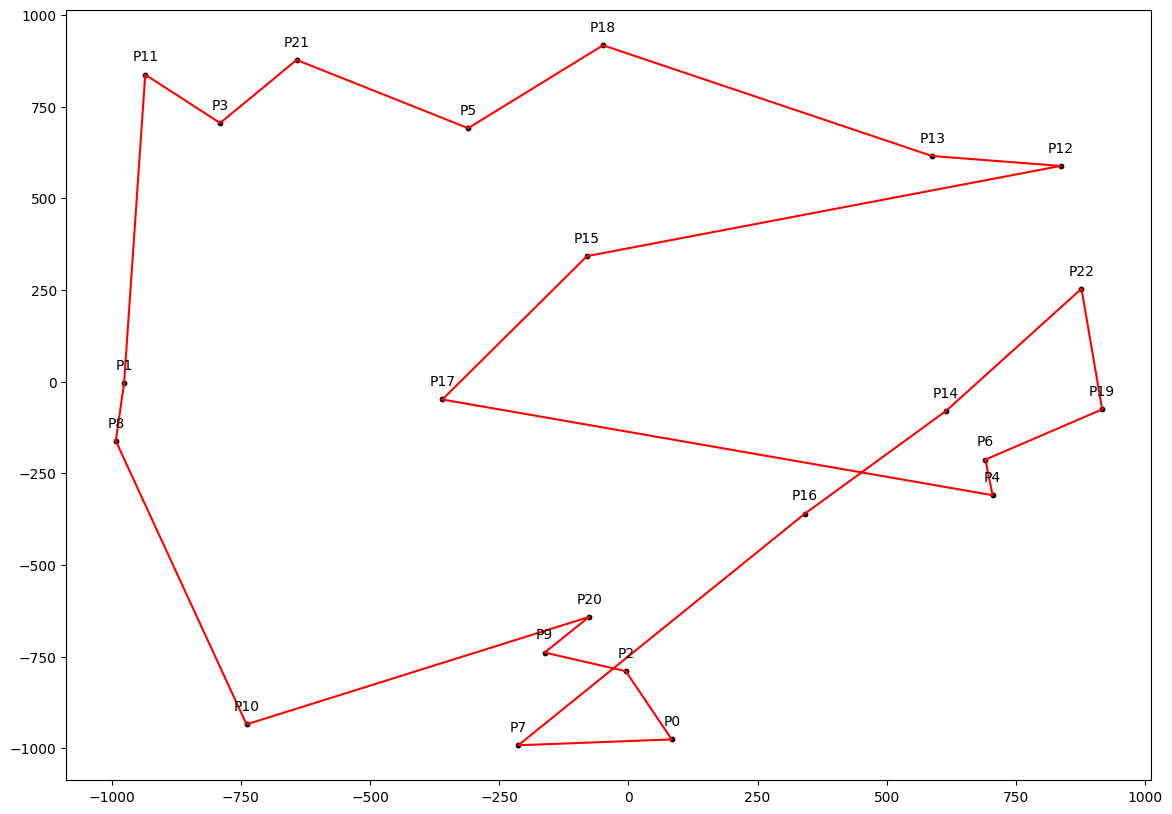

gen :  300


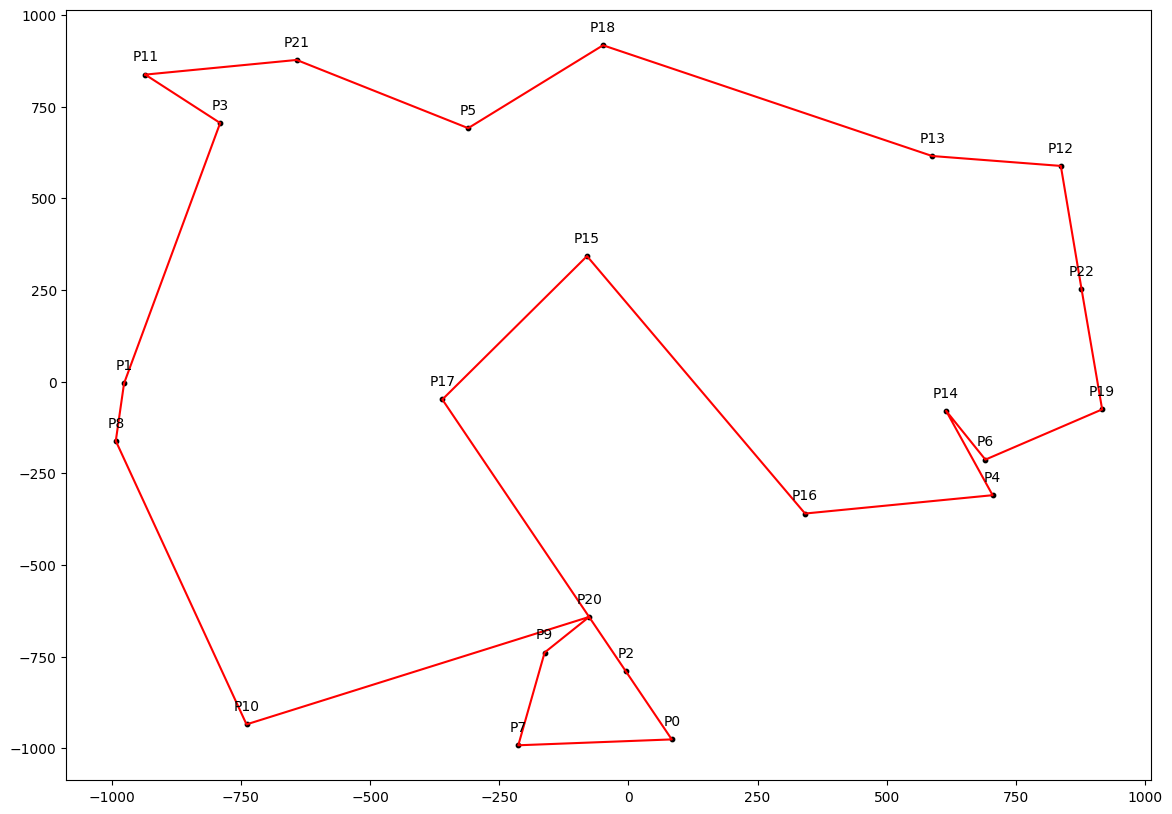

gen :  400


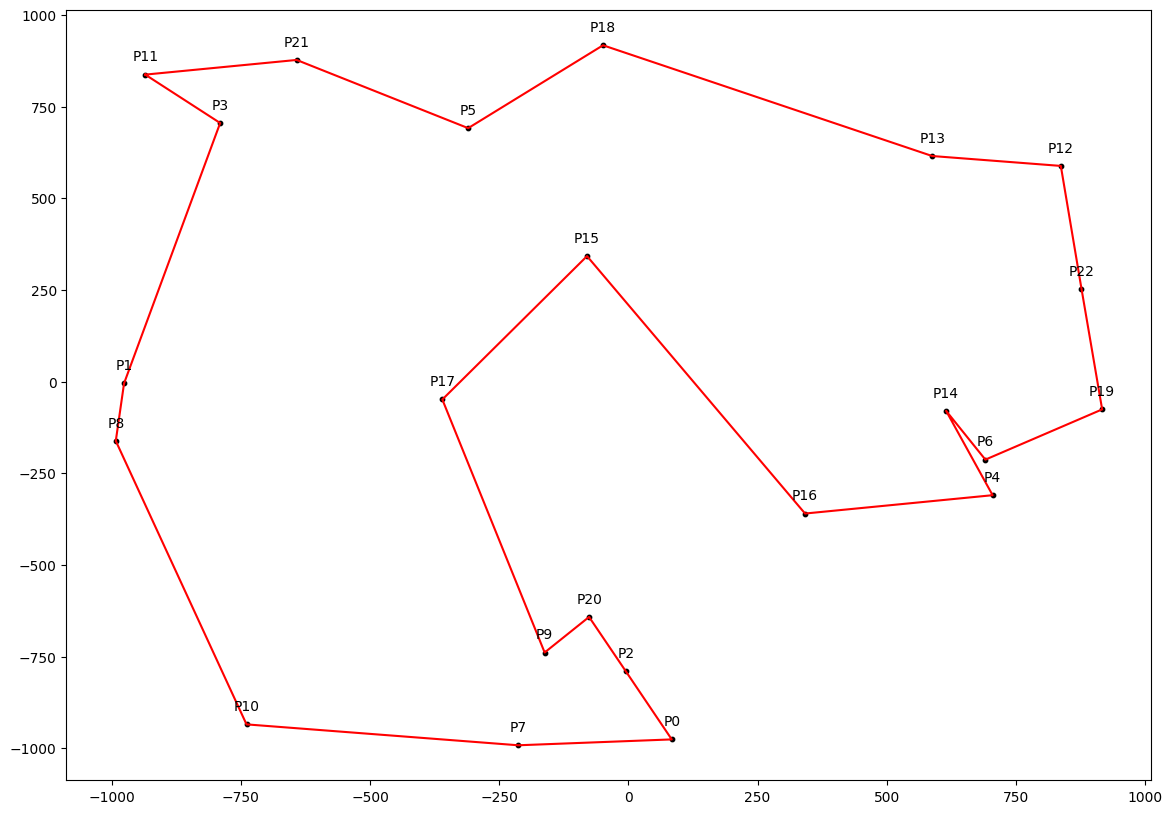

gen :  500


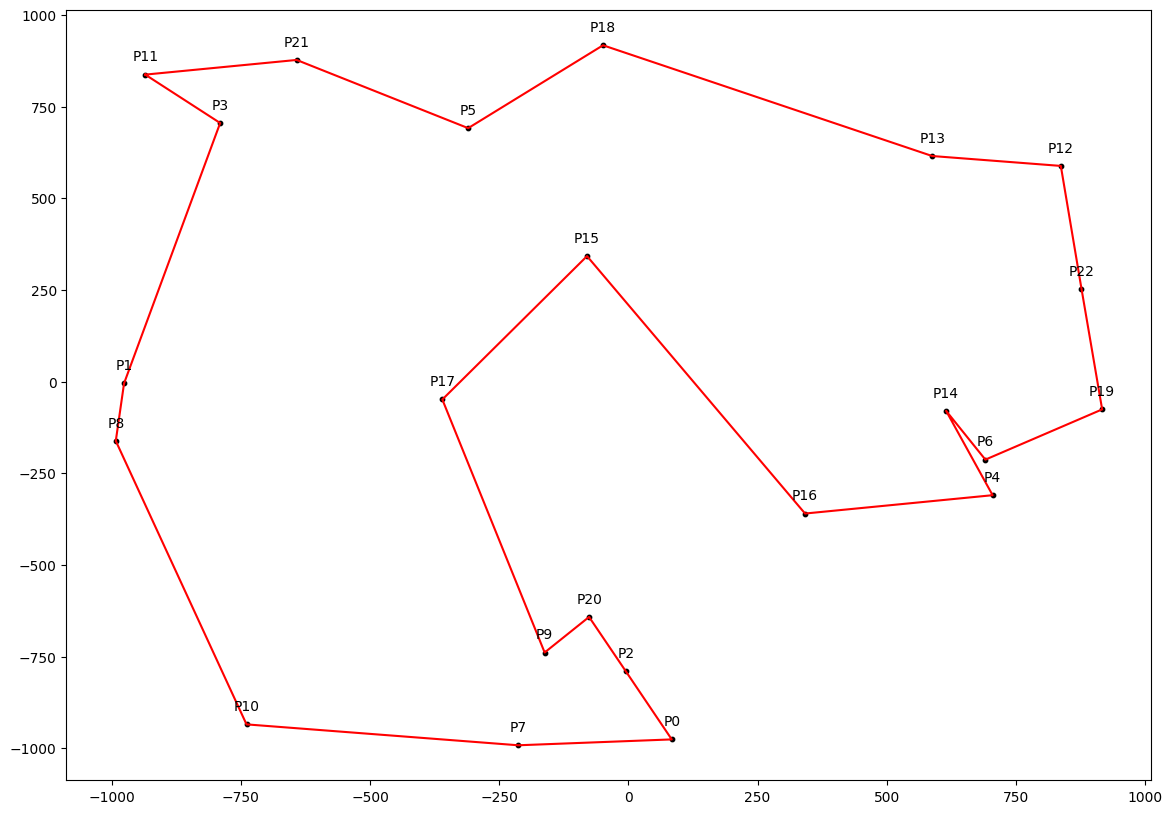

gen :  600


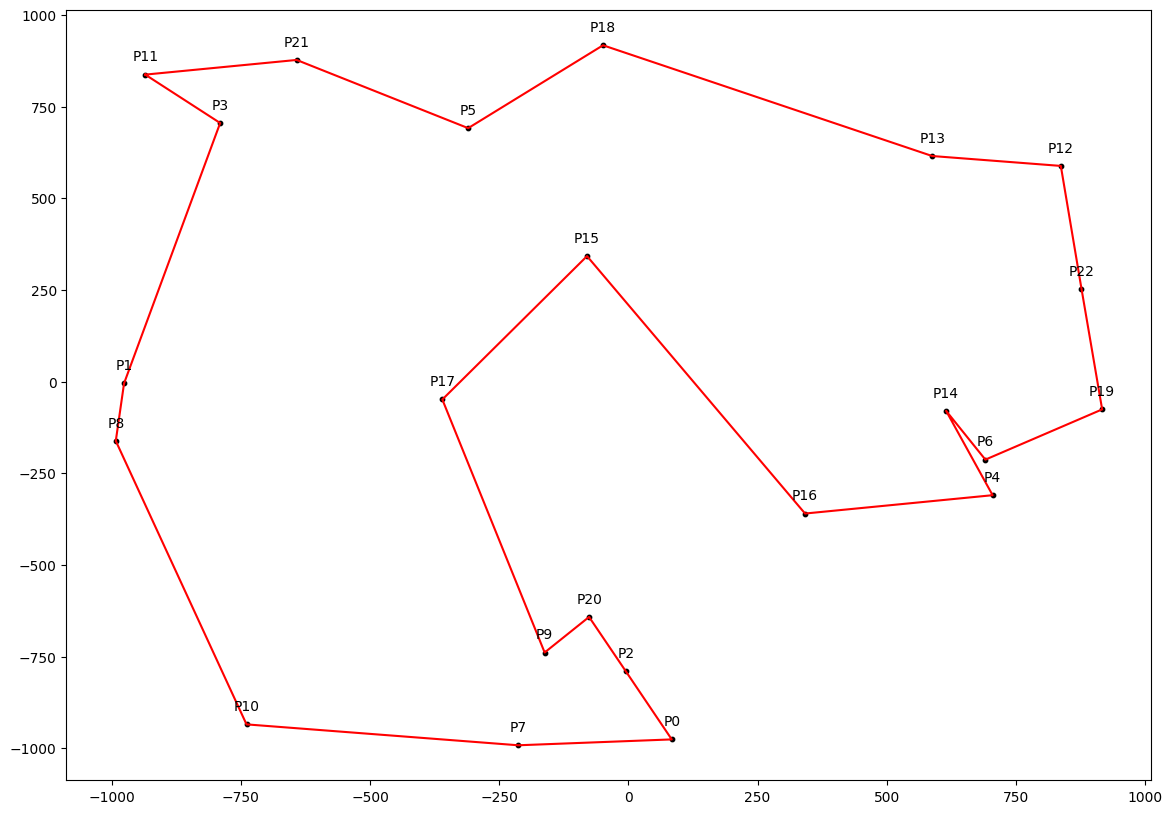

gen :  700


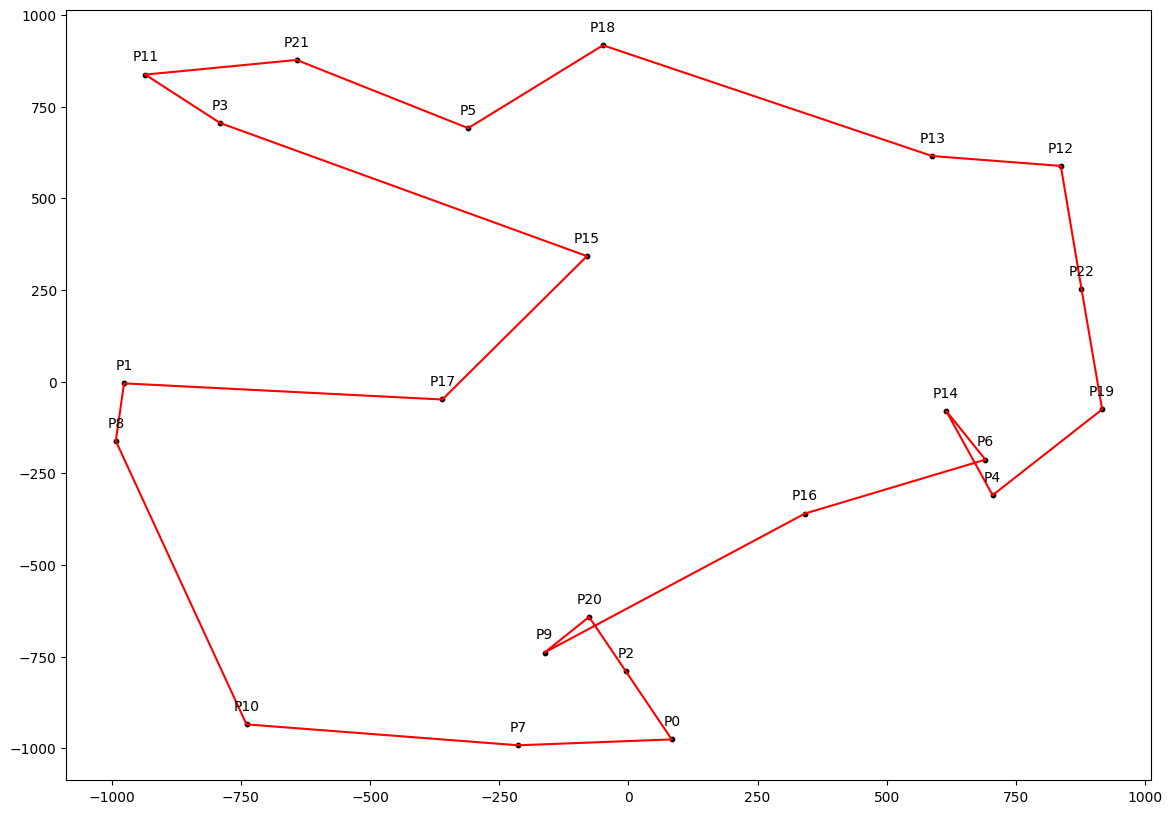

gen :  800


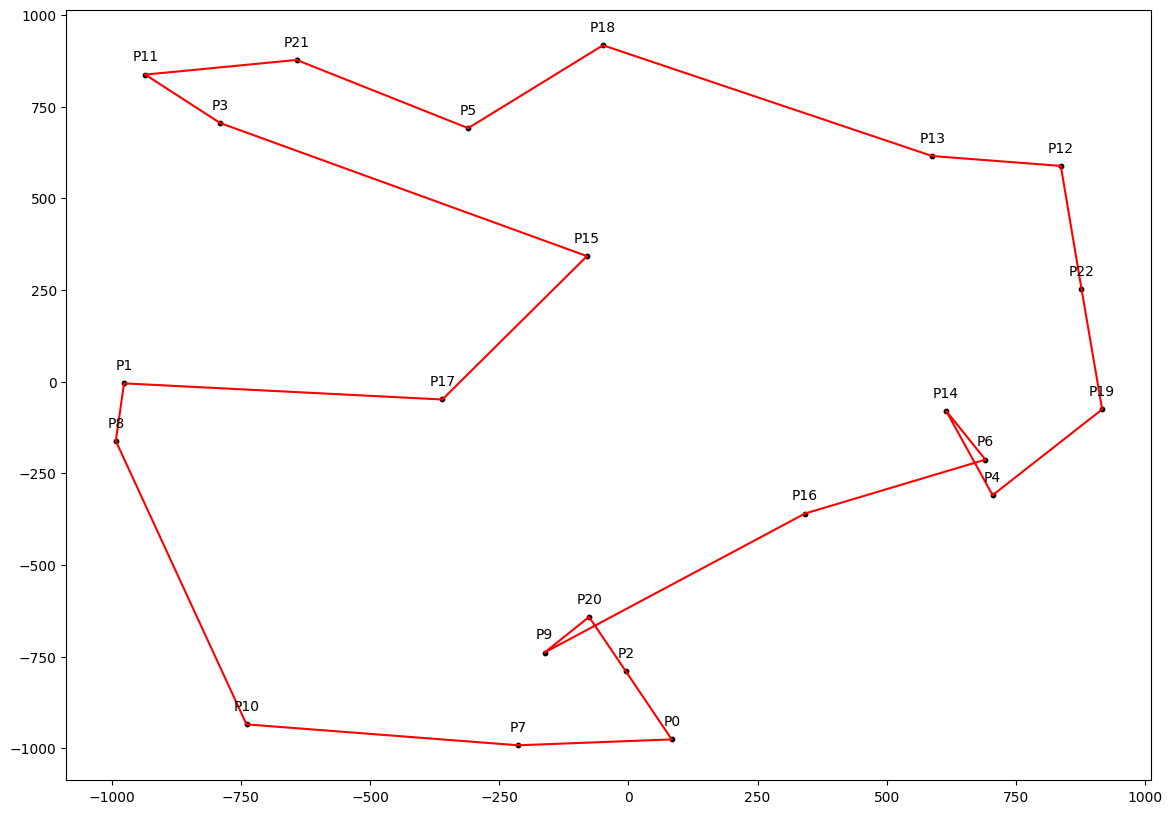

gen :  900


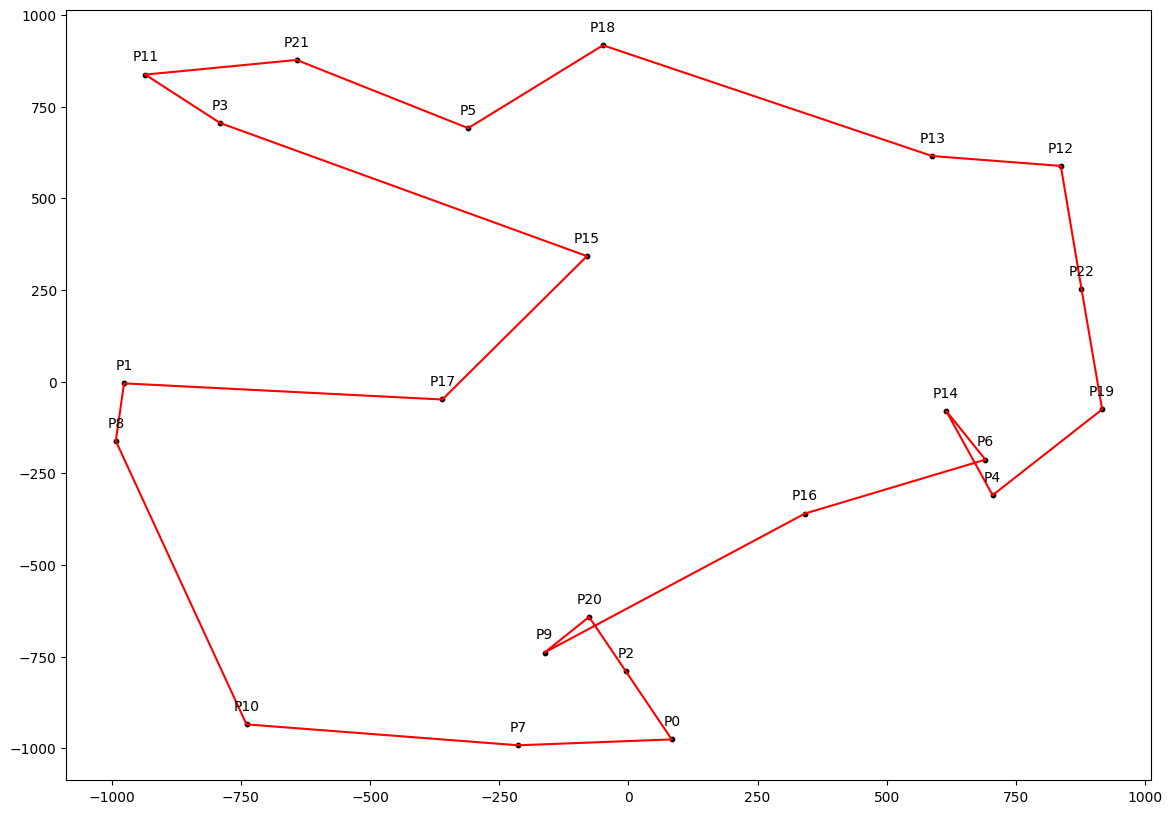

In [70]:
#gerar populacao
nGen = 1000
n=1000
m = 0
registroDistPop = []
geracoes = []
DistIndividualPop = []
listaA = []
listIndex = []
Caminhos = np.zeros((n,pts), dtype=int)
Caminhos2 = np.zeros((n,pts), dtype=int)
BinCaminhos = np.zeros((n,pts), dtype=int)
DistTotalPop = []
lista = []

Caminhos = np.zeros((n,pts), dtype=int)
for i in range(len(Caminhos)):
  Caminhos[i] = random.sample(range(pts), pts)

for gen in range(nGen):
 # print("gen : ", gen)
  Filho = []
  Caminhos2 = []
  listaA = []
  DistTotalPop = []

  Caminhos2 = np.zeros((n,pts), dtype=int)

  for p in range(len(Caminhos)):
      DistTotalPop.append(CalculaDistanciaList(Caminhos[p], matriz_vazia))

  indices_ordenados = OrdenaIndice(DistTotalPop)

  c = 0
  while m < len(Caminhos):
    while m < int(len(Caminhos)/20):

       Filho = Caminhos[indices_ordenados[m]]
       Caminhos2[m] = Filho
       m+=1

       roleta1 = indices_ordenados[m-1]
       roleta2 = indices_ordenados[m]

       percentage = random.randrange(50,70)

       CrossOver = int(pts * percentage/100)

       Filho = list(Caminhos[roleta1][:CrossOver])
       Filho.extend([x for x in Caminhos[roleta2] if x not in Filho])
       Filho = Mutation(Filho)
       Caminhos2[m] = Filho

       m+=1

    if m+1 == len(Caminhos):
      roleta1 = indices_ordenados[m]
      roleta2 = indices_ordenados[0]
    else:
      roleta1 = random.randrange(0,len(Caminhos)-1)
      roleta2 = random.randrange(0,len(Caminhos)-1)

    percentage = random.randrange(50,70)

    CrossOver = int(pts * percentage/100)

    if DistTotalPop[roleta1] < DistTotalPop[roleta2]:
      Filho = list(Caminhos[roleta1][:CrossOver])
      Filho.extend([x for x in Caminhos[roleta2] if x not in Filho])

    else:
      Filho = list(Caminhos[roleta2][:CrossOver])
      Filho.extend([x for x in Caminhos[roleta1] if x not in Filho])

    Filho = Mutation(Filho)
    Caminhos2[m] = Filho
    m+=1

  IndMin = DistTotalPop.index(min(DistTotalPop))
  registroDistPop.append(min(DistTotalPop))
  geracoes.append(gen)
  Caminhos = Caminhos2

  if gen%100 == 0:
    print("gen : ", gen)
    ResultGraph(matriz_vazia)
  m = 0

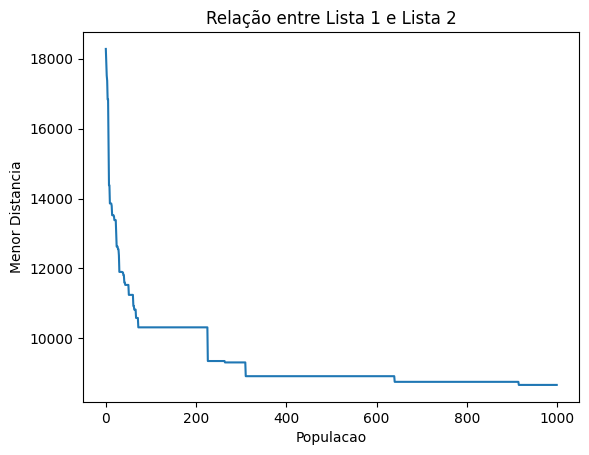

In [71]:
import matplotlib.pyplot as plt

# Listas de dados
lista1 = geracoes
lista2 = registroDistPop

# Plotar o gráfico de linha
plt.plot(lista1, lista2)

# Adicionar rótulos aos eixos x e y
plt.xlabel('Populacao')
plt.ylabel('Menor Distancia')

# Adicionar título ao gráfico
plt.title('Relação entre Lista 1 e Lista 2')

# Exibir o gráfico
plt.show()


gen :  0


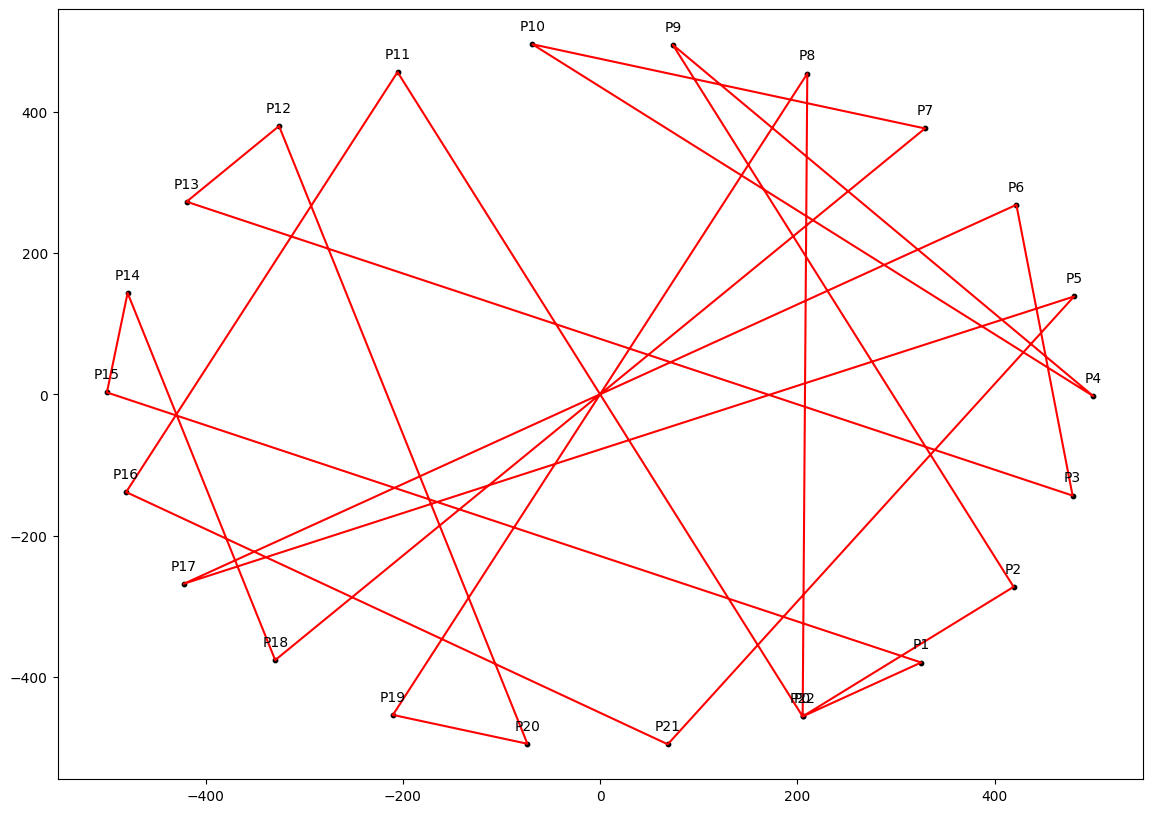

gen :  50


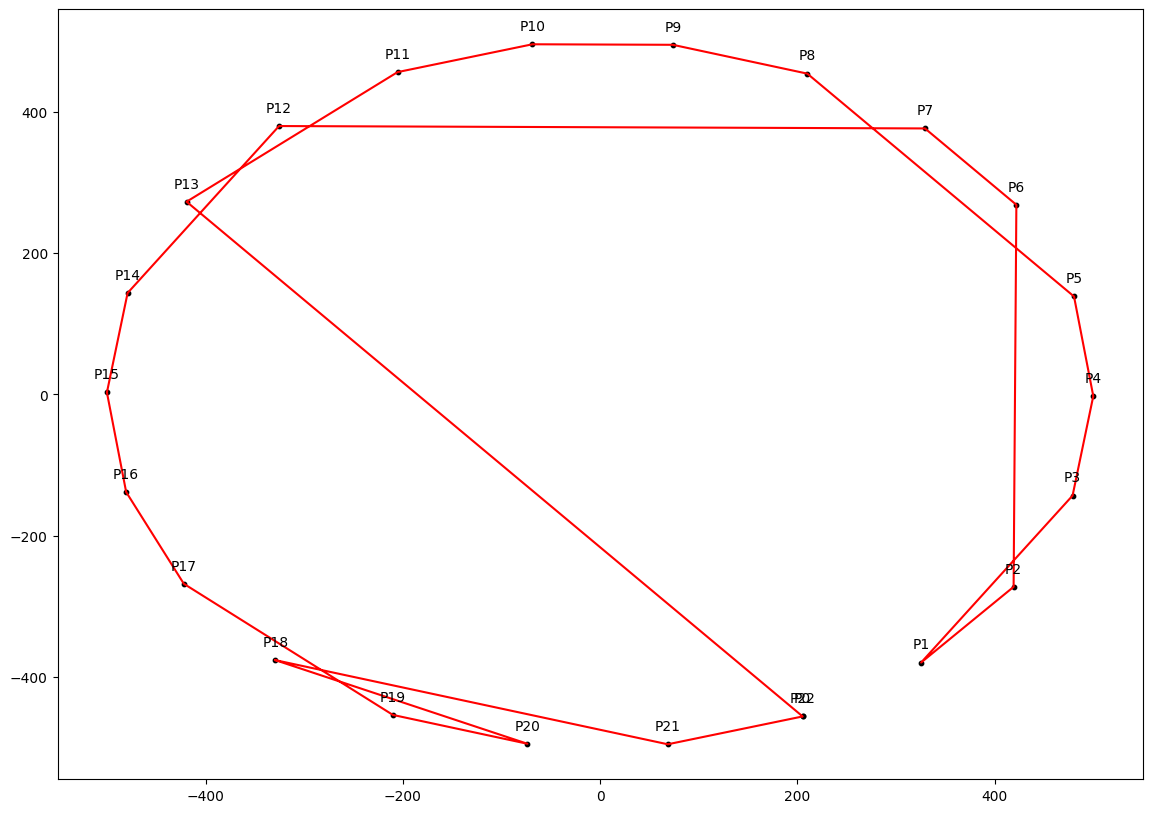

gen :  100


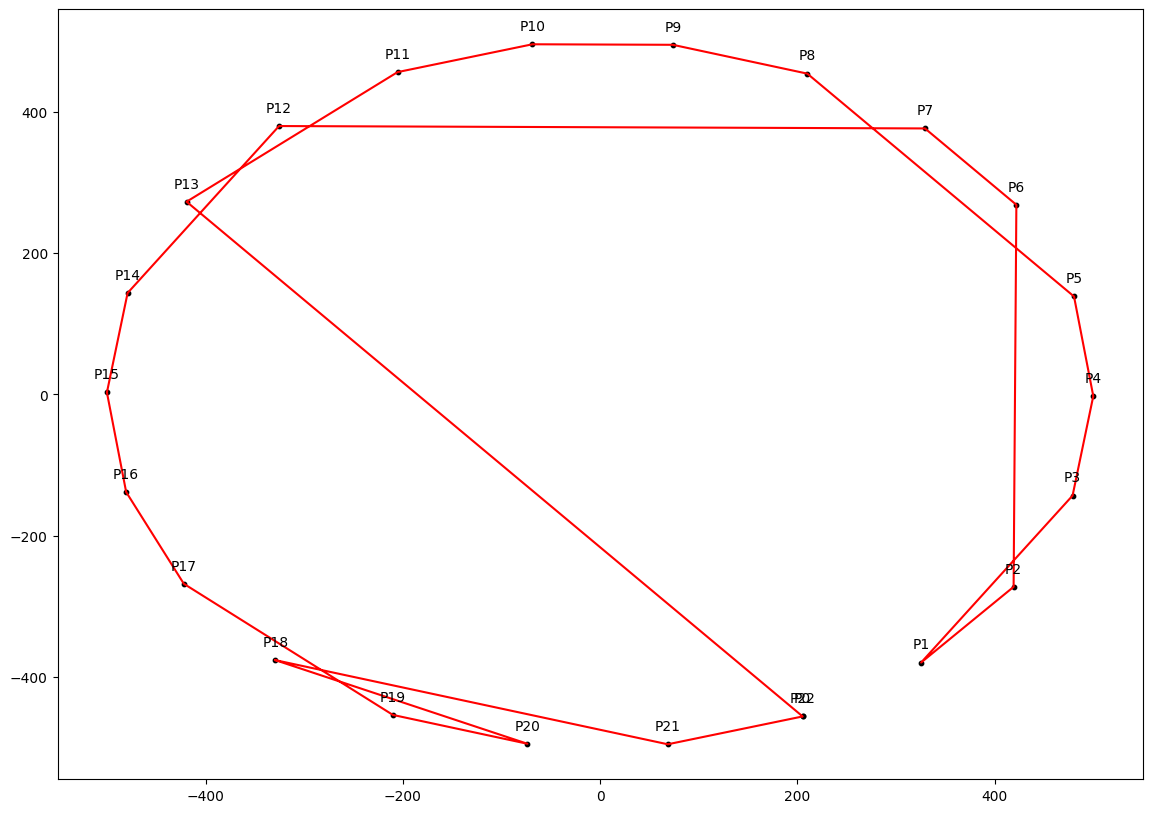

gen :  150


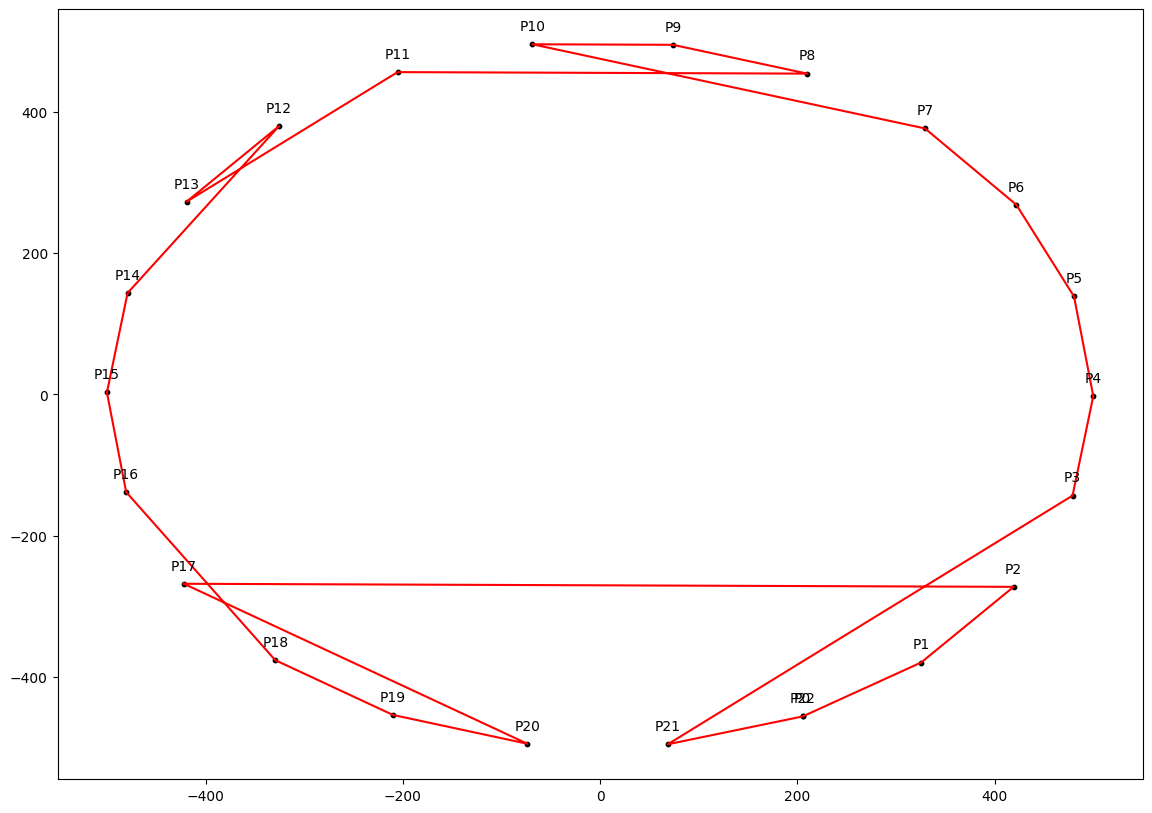

gen :  200


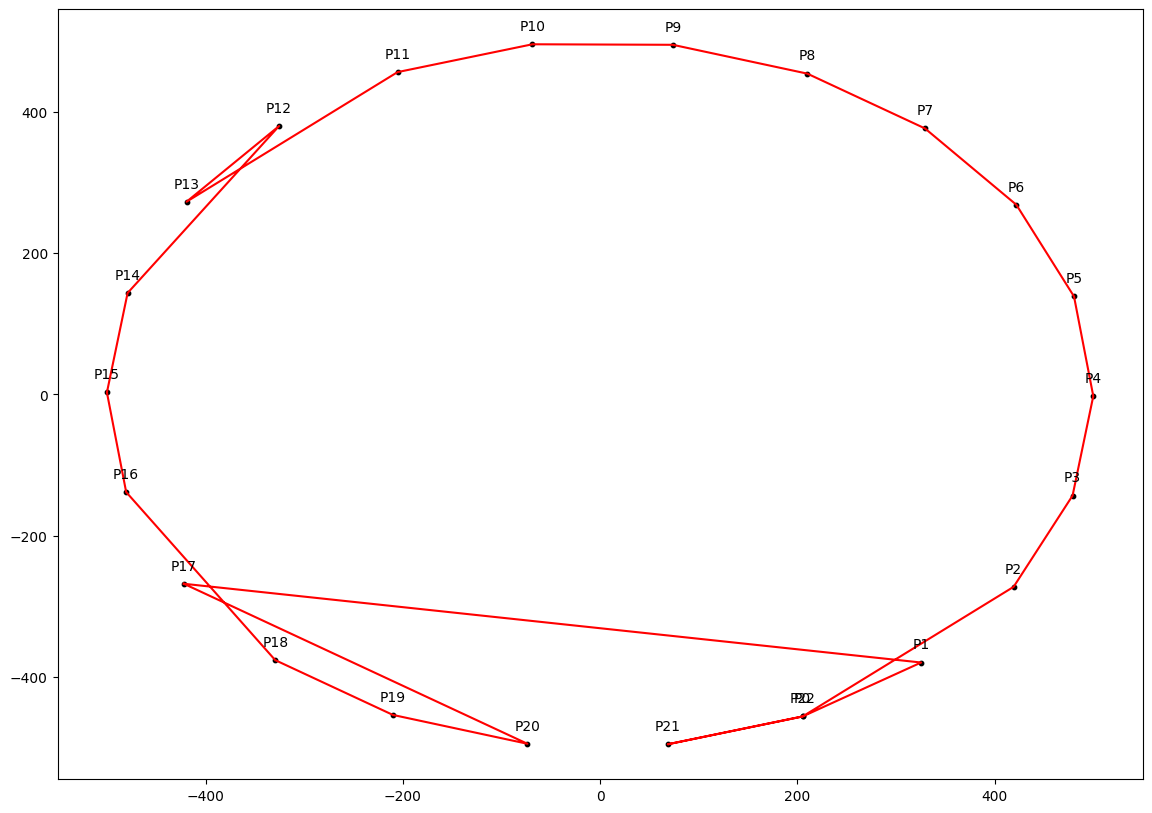

gen :  250


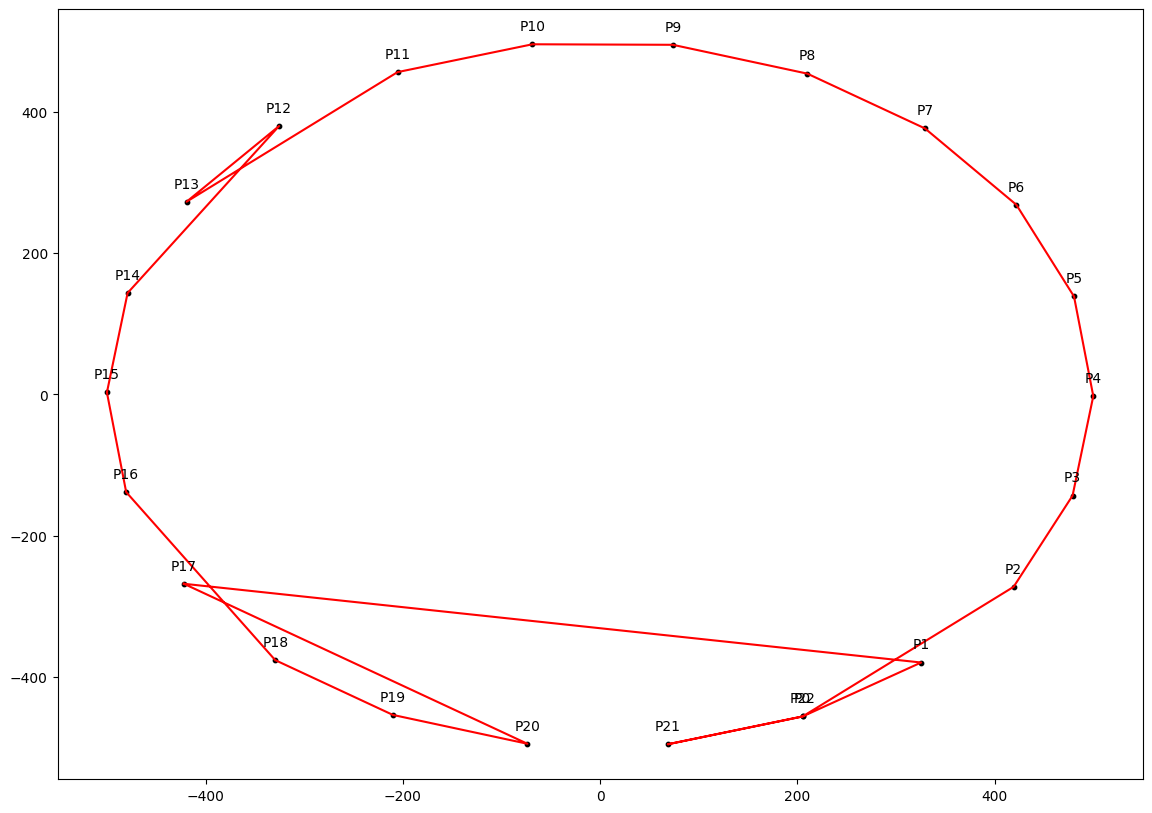

gen :  300


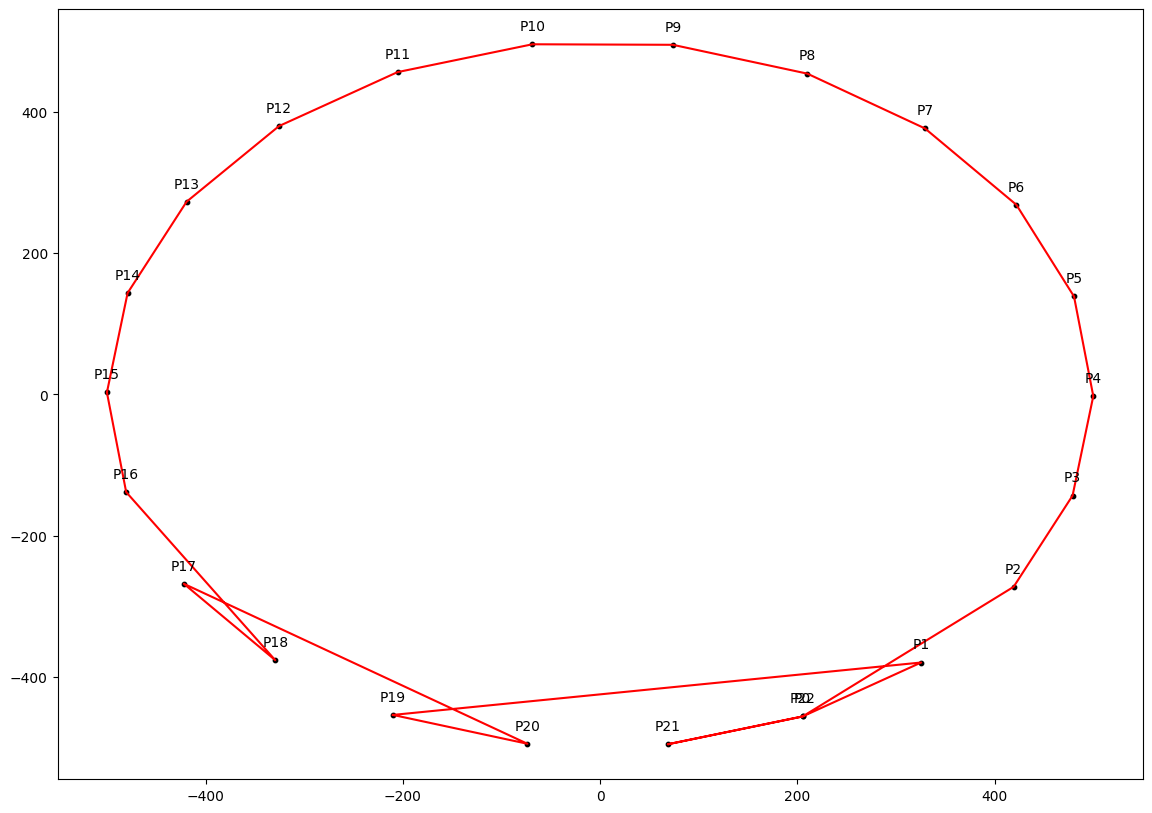

gen :  350


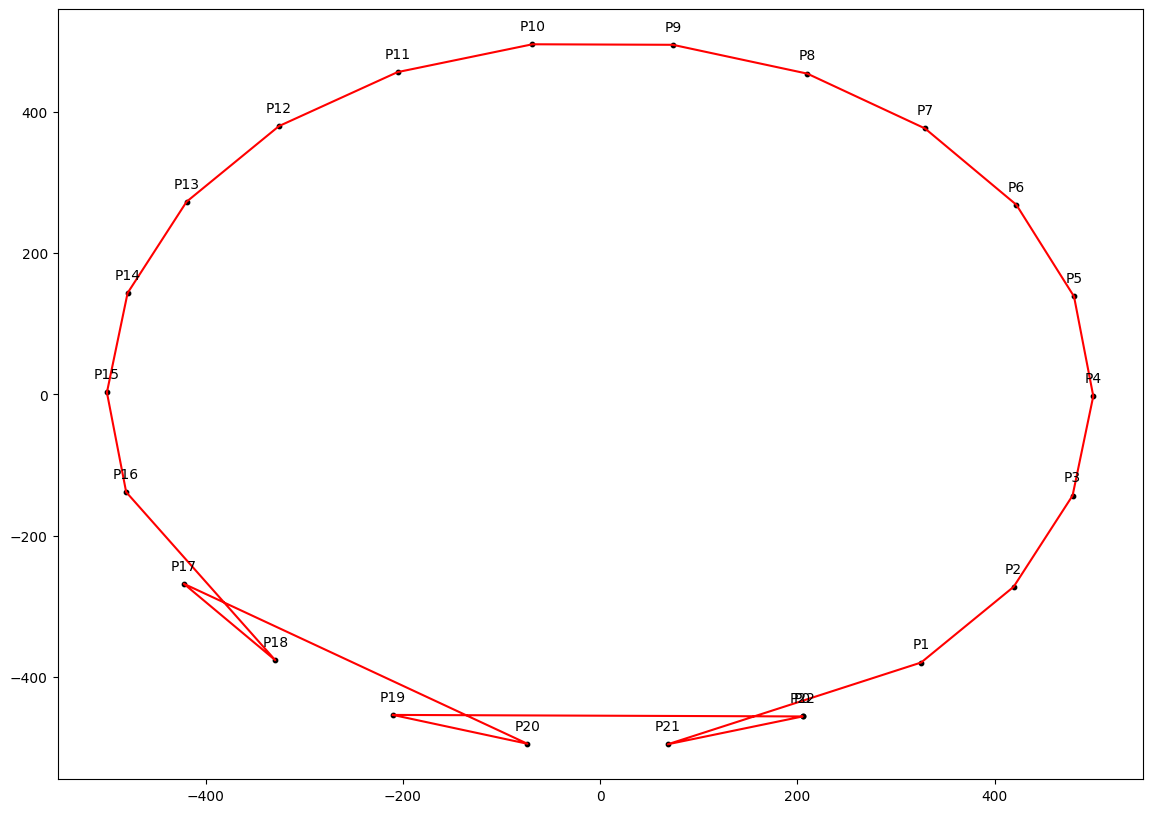

gen :  400


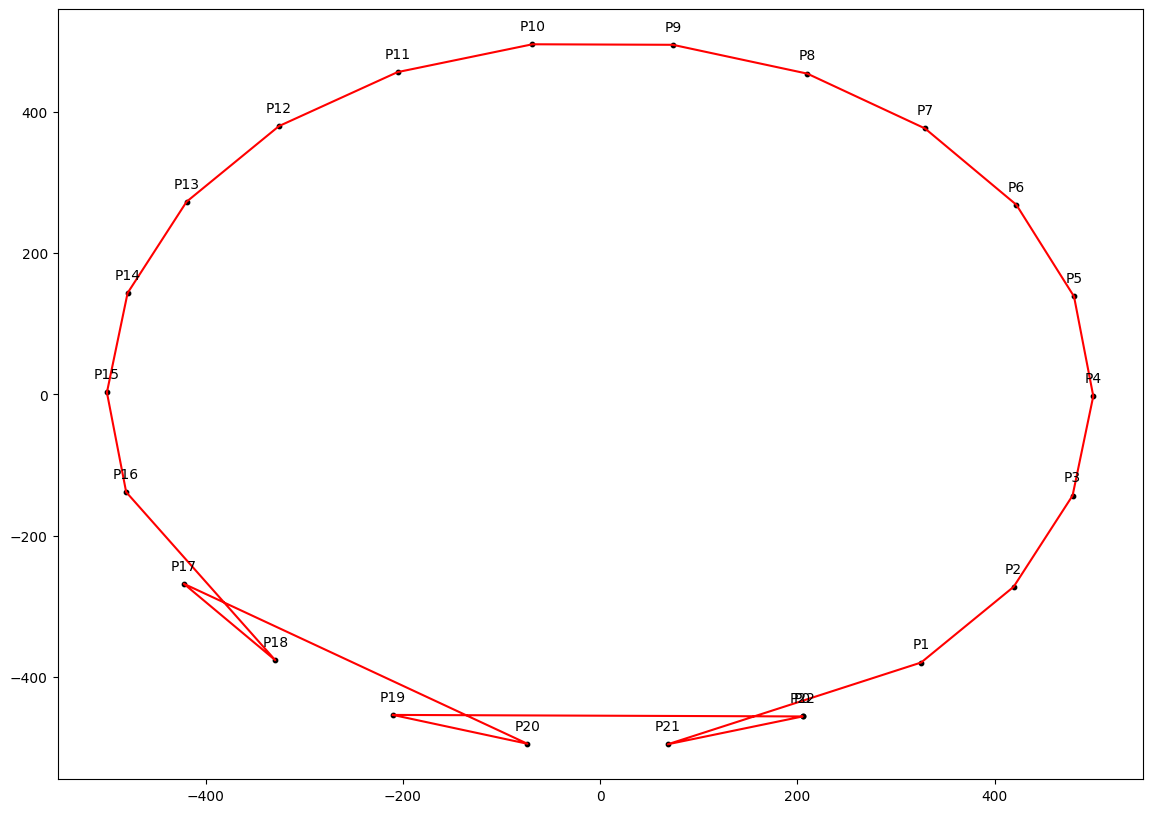

gen :  450


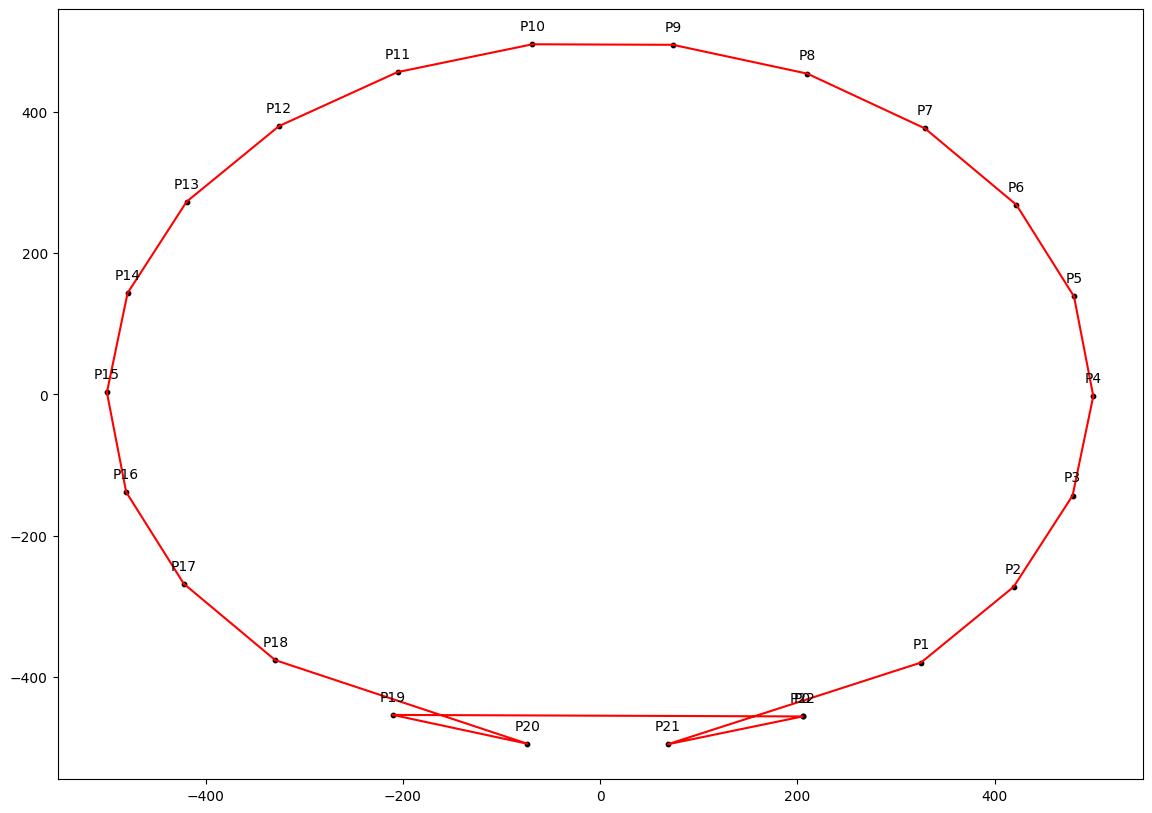

In [72]:
 #gerar populacao
 n = 1000
 m = 0
 registroDistPop = []
 geracoes = []
 DistIndividualPop = []
 listaA = []
 listIndex = []
 Caminhos = np.zeros((n,pts), dtype=int)
 Caminhos2 = np.zeros((n,pts), dtype=int)
 BinCaminhos = np.zeros((n,pts), dtype=int)
 DistTotalPop = []
 lista = []
 Caminhos = np.zeros((n,pts), dtype=int)
 for i in range(len(Caminhos)):
   Caminhos[i] = random.sample(range(pts), pts)
 #print("Caminhos : ", Caminhos)
 #print("Caminhos2 : ", Caminhos2)

 nGen = 500
 for gen in range(nGen):
   #print("gen : ", gen)
   Filho = []
   Caminhos2 = []
   listaA = []
   DistTotalPop = []
   Caminhos2 = np.zeros((n,pts), dtype=int)
   for p in range(len(Caminhos)):
       DistTotalPop.append(CalculaDistanciaList(Caminhos[p], matriz_vazia_circular))
   indices_ordenados = OrdenaIndice(DistTotalPop)
   #listIndex = TheBest2(DistTotalPop)
   #print(listIndex)
   c = 0
   while m < len(Caminhos):
     while m < int(len(Caminhos)/20):
        Filho = Caminhos[indices_ordenados[m]]
        #Filho = Mutation(Filho)
        Caminhos2[m] = Filho
        m+=1
        roleta1 = indices_ordenados[m-1]
        roleta2 = indices_ordenados[m]
        percentage = random.randrange(50,60)

        CrossOver = int(pts * percentage/100)
        Filho = list(Caminhos[roleta1][:CrossOver])
        Filho.extend([x for x in Caminhos[roleta2] if x not in Filho])
        Filho = Mutation(Filho)
        Caminhos2[m] = Filho
        m+=1
     if m+1 == len(Caminhos):
       roleta1 = indices_ordenados[m]
       roleta2 = indices_ordenados[0]
     else:
       roleta1 = random.randrange(0,len(Caminhos)-1)
       roleta2 = random.randrange(0,len(Caminhos)-1)
     percentage = random.randrange(50,70)

     CrossOver = int(pts * percentage/100)
     if DistTotalPop[roleta1] < DistTotalPop[roleta2]:
       Filho = list(Caminhos[roleta1][:CrossOver])
       #print(Caminhos[roleta1], " -- ", Filho)
       Filho.extend([x for x in Caminhos[roleta2] if x not in Filho])
     else:
       Filho = list(Caminhos[roleta2][:CrossOver])
       Filho.extend([x for x in Caminhos[roleta1] if x not in Filho])
     Filho = Mutation(Filho)
     Caminhos2[m] = Filho
     m+=1

   IndMin = DistTotalPop.index(min(DistTotalPop))
   #print(min(DistTotalPop))
   registroDistPop.append(min(DistTotalPop))
   geracoes.append(gen)
   Caminhos = Caminhos2
   if gen%50 == 0:
     print("gen : ", gen)
     ResultGraph(matriz_vazia_circular)
   m = 0


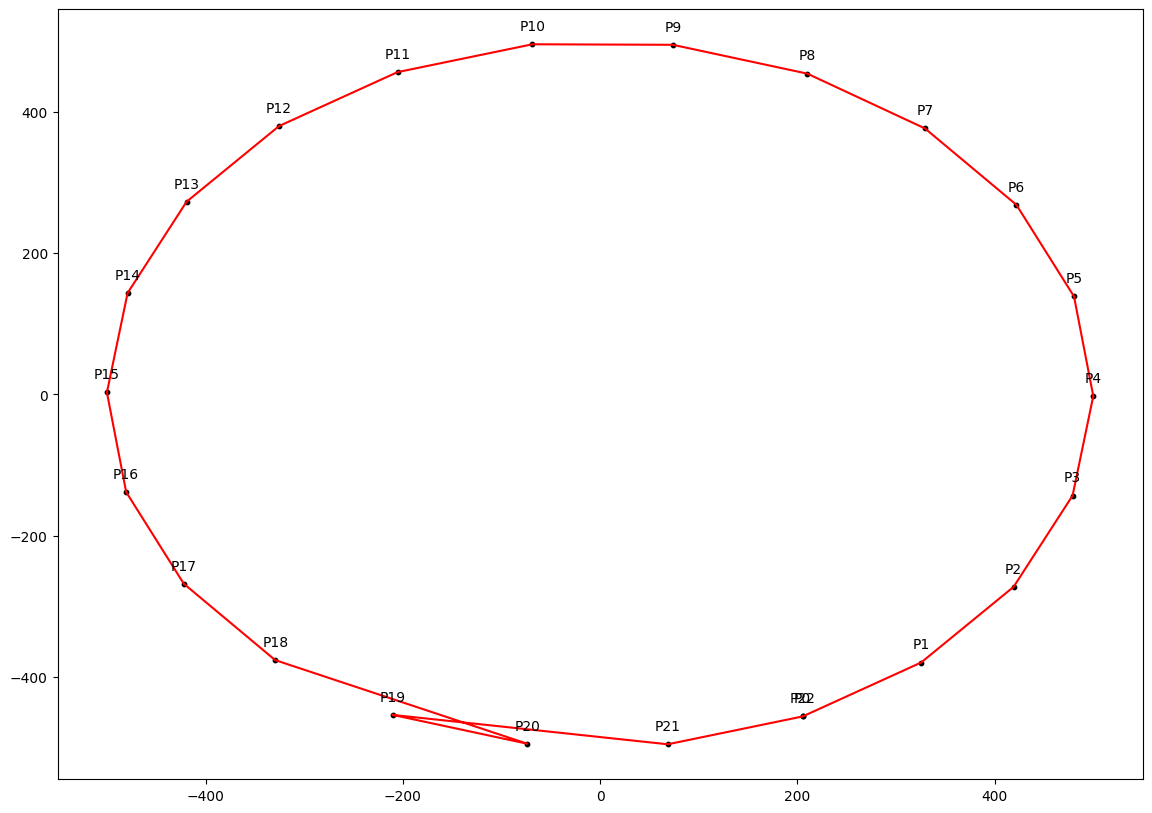

In [73]:
ResultGraph(matriz_vazia_circular)

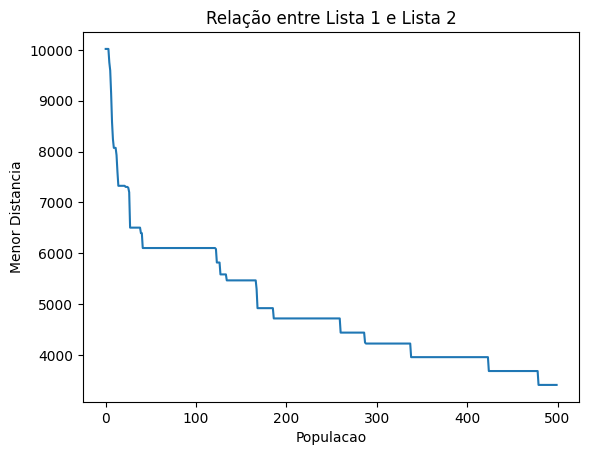

In [74]:
lista1 = geracoes
lista2 = registroDistPop

# Plotar o gráfico de linha
plt.plot(lista1, lista2)

# Adicionar rótulos aos eixos x e y
plt.xlabel('Populacao')
plt.ylabel('Menor Distancia')

# Adicionar título ao gráfico
plt.title('Relação entre Lista 1 e Lista 2')

# Exibir o gráfico
plt.show()
